In [38]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
X, y  = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

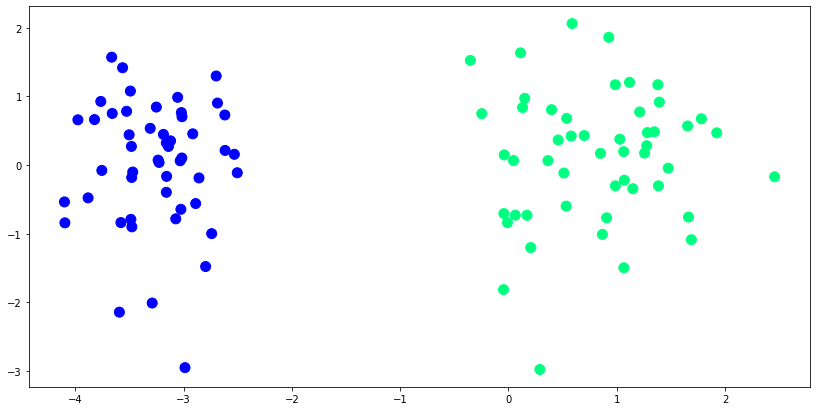

In [75]:
plt.figure(figsize=(14,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

(-3.0, 2.0)

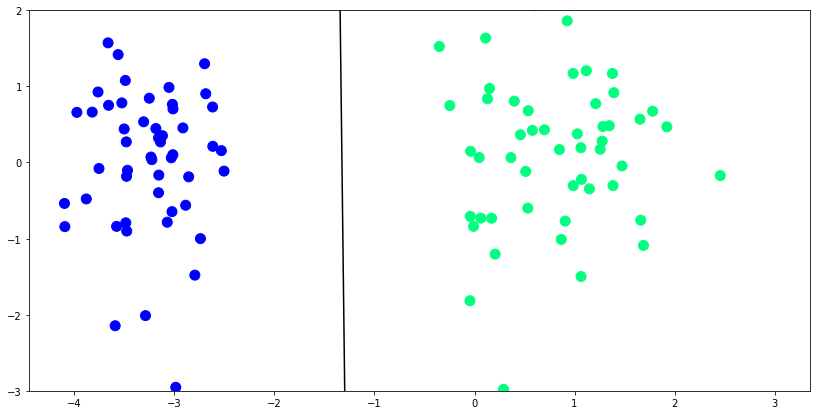

In [76]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)

clf.coef_ , clf.intercept_

A = clf.coef_[0][0]
B = clf.coef_[0][1]
C = clf.intercept_[0]
m2 = -(A / B)
b2 = -(C / B)

x_input1 = np.linspace(-3,3,100)
y_input1 = m2*x_input1+b2

plt.figure(figsize=(14,7))
plt.plot(x_input1,y_input1,color='black')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [104]:
print(m2,b2)

-108.63393776921528 -143.95745880352618


In [97]:
def logisticGD(X,y):
    
    X = np.insert(X,0,1,axis = 1)
    weights = np.ones(X.shape[1])
    learning_rate = 0.5
    
    for i in range(50000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + ((learning_rate * np.dot((y-y_hat),X))/X.shape[0])
    
    return weights[0],weights[1:]

def sigmoid(val):
    fxn = 1/(1 + np.exp(-val))
    return fxn

In [102]:
intercept, slopes = logisticGD(X,y)
slopes

array([6.52286898, 0.3730028 ])

In [103]:
m = -(slopes[0] / slopes[1])
b = -(intercept / slopes[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input+b
print(m,b)

-17.4874531889486 -21.991312899485198


(-3.0, 2.0)

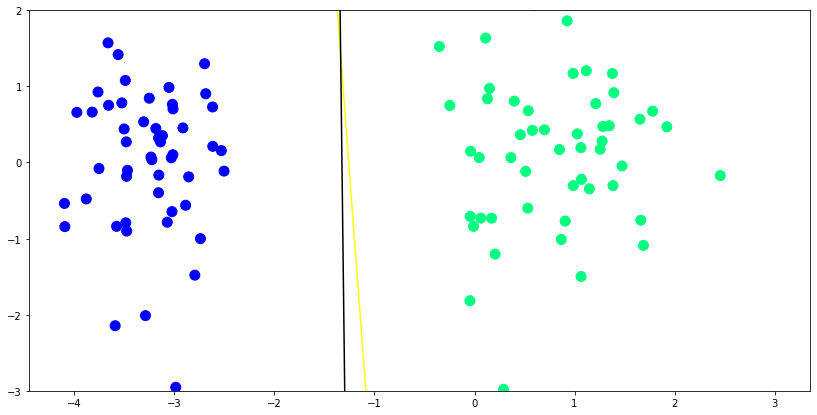

In [100]:
plt.figure(figsize=(14,7))
plt.plot(x_input,y_input,color='yellow')
plt.plot(x_input1,y_input1,color='black')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)